### Classification using Keras 
Note: Keras uses TensorFlow by default. You can switch backend to Theano (see https://keras.io/backend/ for details)

In [1034]:
import keras 
keras.__version__

'2.0.4'

In [1035]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, log_loss, classification_report
from sklearn.metrics import confusion_matrix , mean_squared_error, r2_score
from sklearn.datasets import load_iris, load_boston

# Import `Sequential` from `keras.models`
from keras.models import Sequential
# Import `Dense` from `keras.layers`
from keras.layers import Dense, Activation, Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.optimizers import SGD, RMSprop, Adam
from keras.regularizers import l1, l2

np.random.seed = 42   # for reproduction
iris = load_iris()
X = iris.data
y = iris.target 
X = X.astype('float32')
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, train_size = 0.7, random_state=707)

nb_classes = len(set(y_train))
print(nb_classes, 'classes')

dims = X_train.shape[1]
print(dims, 'dims')#

y_test_c = y_test
# Convert labels to categorical one-hot encoding (there is also a sklear wrapper)
y_train = keras.utils.to_categorical(y_train, num_classes=3)
y_test = keras.utils.to_categorical(y_test, num_classes=3)

3 classes
4 dims


In [1036]:
#### https://keras.io/getting-started/sequential-model-guide/
sgdi = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model = Sequential()
model.add(Dense(10, activation='relu', input_dim=dims))
model.add(Dense(nb_classes, activation='softmax'))
model.compile(optimizer=sgdi, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_497 (Dense)            (None, 10)                50        
_________________________________________________________________
dense_498 (Dense)            (None, 3)                 33        
Total params: 83
Trainable params: 83
Non-trainable params: 0
_________________________________________________________________


In [1037]:
early_stop = EarlyStopping(monitor='val_loss', patience=5, verbose=1) 
Result = model.fit(X_train, y_train, validation_split =0.2, epochs=50, # validation_data = (X_test, y_test)
          batch_size=15, verbose=True, callbacks=[early_stop]) #callbacks=[best_model, early_stop]

Train on 84 samples, validate on 21 samples
Epoch 1/50
84/84 [==============================] - 2s - loss: 1.3085 - acc: 0.3333 - val_loss: 1.3342 - val_acc: 0.2381
Epoch 2/50
84/84 [==============================] - 0s - loss: 0.9324 - acc: 0.6548 - val_loss: 0.8086 - val_acc: 0.7619
Epoch 3/50
84/84 [==============================] - 0s - loss: 0.7091 - acc: 0.8214 - val_loss: 0.8038 - val_acc: 0.5238
Epoch 4/50
84/84 [==============================] - 0s - loss: 0.5683 - acc: 0.7024 - val_loss: 0.6324 - val_acc: 0.5714
Epoch 5/50
84/84 [==============================] - 0s - loss: 0.4720 - acc: 0.7262 - val_loss: 0.5430 - val_acc: 0.7619
Epoch 6/50
84/84 [==============================] - 0s - loss: 0.4136 - acc: 0.8690 - val_loss: 0.4834 - val_acc: 0.8095
Epoch 7/50
84/84 [==============================] - 0s - loss: 0.3940 - acc: 0.8690 - val_loss: 0.4533 - val_acc: 0.8095
Epoch 8/50
84/84 [==============================] - 0s - loss: 0.3469 - acc: 0.9048 - val_loss: 0.3967 - val_

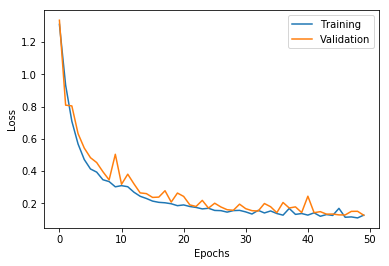

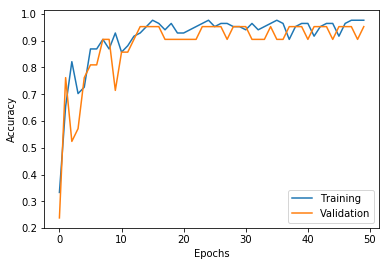

In [1038]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(Result.history['loss'])
plt.plot(Result.history['val_loss'])
plt.legend(['Training', 'Validation'])

plt.figure()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(Result.history['acc'])
plt.plot(Result.history['val_acc'])
plt.legend(['Training', 'Validation'], loc='lower right')

In [1039]:
y_pred = model.predict(X_test)
score = model.evaluate(X_test, y_test,verbose=1)
print("\n score: ",score)

32/45 [====================>.........] - ETA: 0s
 score:  [0.051197536951965758, 0.97777777777777775]


In [1040]:
y_pred_c = model.predict_classes(X_test)
# Confusion matrix
confusion_matrix(y_test_c, y_pred_c)

32/45 [====================>.........] - ETA: 0s

array([[15,  0,  0],
       [ 0, 14,  1],
       [ 0,  0, 15]])

In [1041]:
# Precision 
#precision_score(y_test, y_pred)
log_loss(y_test, y_pred)

0.051197537285689682

In [1042]:
y_pred_c[:10]

array([2, 1, 2, 0, 0, 1, 2, 0, 1, 2], dtype=int64)

In [1043]:
y_pred[:10]

array([[  4.29935562e-06,   1.22276517e-02,   9.87767994e-01],
       [  5.33890584e-03,   9.85195398e-01,   9.46568418e-03],
       [  4.50710431e-05,   1.54280931e-01,   8.45673978e-01],
       [  9.96310174e-01,   3.68983857e-03,   3.73962528e-10],
       [  9.97425973e-01,   2.57403450e-03,   4.58050924e-11],
       [  2.96956971e-02,   9.63809311e-01,   6.49506226e-03],
       [  2.19391595e-07,   4.52001439e-03,   9.95479703e-01],
       [  9.94876564e-01,   5.12344716e-03,   2.60549582e-10],
       [  5.38422726e-03,   9.78536487e-01,   1.60792395e-02],
       [  1.41054825e-05,   1.25773221e-01,   8.74212623e-01]], dtype=float32)

### Regression example in Keras

In [1044]:
from sklearn.datasets import load_boston 
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.utils import shuffle
from sklearn.metrics import r2_score, mean_squared_error
boston = load_boston()
Xb, yb = shuffle(boston.data, boston.target, random_state=13)
Xb_train, Xb_test, yb_train, yb_test = train_test_split(Xb, yb, train_size=0.751, random_state=717)
scalerS = StandardScaler()
scalerM = MinMaxScaler()
scalerS.fit(Xb_train)
Xb_train = scalerS.transform(Xb_train)
Xb_test = scalerS.transform(Xb_test)

In [1045]:
## https://keras.io/initializers/
modelb = Sequential()
modelb.add(Dense(52, input_dim=13, activation='relu', kernel_regularizer=l2(0.01),
                activity_regularizer=l1(0.01),
        kernel_initializer='random_normal', bias_initializer='random_normal')) # try w/out kernel & bias
modelb.add(Dense(26, activation='relu'))
modelb.add(Dense(1, activation='linear'))
# Compile model
#adam = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
sgd = SGD(lr=0.00125, decay=1e-6, momentum=0.9, nesterov=True)
modelb.compile(loss='mean_squared_error', optimizer=sgd)  # rmsprop
modelb.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_499 (Dense)            (None, 52)                728       
_________________________________________________________________
dense_500 (Dense)            (None, 26)                1378      
_________________________________________________________________
dense_501 (Dense)            (None, 1)                 27        
Total params: 2,133
Trainable params: 2,133
Non-trainable params: 0
_________________________________________________________________


In [1046]:
early_stopb = EarlyStopping(monitor='val_loss', patience=5, verbose=1) 
Resultb = modelb.fit(Xb_train, yb_train, validation_data = (Xb_test, yb_test), epochs=200, 
          batch_size=128, verbose=True, validation_split=0.25, callbacks=[early_stopb])

Train on 380 samples, validate on 126 samples
Epoch 1/200
380/380 [==============================] - 2s - loss: 565.2475 - val_loss: 577.1082
Epoch 2/200
380/380 [==============================] - 0s - loss: 475.4054 - val_loss: 321.2440
Epoch 3/200
380/380 [==============================] - 0s - loss: 200.2006 - val_loss: 100.9111
Epoch 4/200
380/380 [==============================] - 0s - loss: 77.3871 - val_loss: 45.5275
Epoch 5/200
380/380 [==============================] - 0s - loss: 48.5056 - val_loss: 46.5390
Epoch 6/200
380/380 [==============================] - 0s - loss: 44.1652 - val_loss: 41.4886
Epoch 7/200
380/380 [==============================] - 0s - loss: 41.9866 - val_loss: 37.6308
Epoch 8/200
380/380 [==============================] - 0s - loss: 38.7698 - val_loss: 32.7485
Epoch 9/200
380/380 [==============================] - 0s - loss: 35.1914 - val_loss: 30.9177
Epoch 10/200
380/380 [==============================] - 0s - loss: 33.3120 - val_loss: 29.5645
Epoch 1

380/380 [==============================] - 0s - loss: 8.0164 - val_loss: 10.3223
Epoch 87/200
380/380 [==============================] - 0s - loss: 8.1769 - val_loss: 10.3573
Epoch 88/200
380/380 [==============================] - 0s - loss: 8.1123 - val_loss: 10.0470
Epoch 89/200
380/380 [==============================] - 0s - loss: 7.9204 - val_loss: 10.1309
Epoch 90/200
380/380 [==============================] - 0s - loss: 8.0432 - val_loss: 10.5751
Epoch 91/200
380/380 [==============================] - 0s - loss: 7.9096 - val_loss: 9.8698
Epoch 92/200
380/380 [==============================] - 0s - loss: 8.2153 - val_loss: 9.6688
Epoch 93/200
380/380 [==============================] - 0s - loss: 8.3476 - val_loss: 10.9251
Epoch 94/200
380/380 [==============================] - 0s - loss: 7.9757 - val_loss: 10.2974
Epoch 95/200
380/380 [==============================] - 0s - loss: 7.7295 - val_loss: 10.4619
Epoch 96/200
380/380 [==============================] - 0s - loss: 7.7986 -

In [1047]:
#[item for item in Resultb.history], [item for item in Result.history]

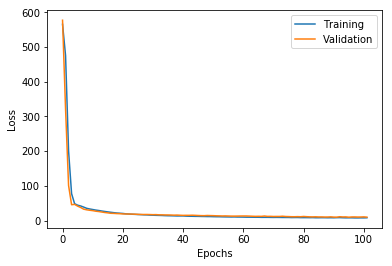

In [1048]:
plt.figure()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(Resultb.history['loss'])
plt.plot(Resultb.history['val_loss'])
plt.legend(['Training', 'Validation'])

In [1049]:
yb_predicted = modelb.predict(Xb_test)
score = mean_squared_error(yb_predicted, yb_test)
Rsq = r2_score(yb_test, yb_predicted)
print('MSE: {0:f}'.format(score))
print('RMSE: {0:f}'.format(score**0.5))
print('R^2: {0:f}'.format(Rsq))


MSE: 7.578426
RMSE: 2.752894
R^2: 0.910057


In [1050]:
yb_predicted[:10]

array([[ 12.23628044],
       [ 32.5753479 ],
       [ 23.41984367],
       [ 30.30661583],
       [ 22.70264435],
       [ 38.24320221],
       [ 23.43625069],
       [ 18.67465973],
       [ 34.53895187],
       [ 21.55364799]], dtype=float32)

In [1051]:
yb_test[:10]

array([ 14.9,  31.7,  22.5,  30.7,  20.3,  27. ,  23. ,  18.6,  34.9,  21. ])

In [1052]:
# put next to each other ...
for i in zip(list(yb_predicted[:10,0]),yb_test[:10]):
    print (i)

(12.23628, 14.9)
(32.575348, 31.699999999999999)
(23.419844, 22.5)
(30.306616, 30.699999999999999)
(22.702644, 20.300000000000001)
(38.243202, 27.0)
(23.436251, 23.0)
(18.67466, 18.600000000000001)
(34.538952, 34.899999999999999)
(21.553648, 21.0)
